In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import nibabel as nib
import random

In [5]:
Vect_vox=[]

for i in range(1000):
    fold='SLA'+str(i+1)+'_50'
    V0 = nib.load(os.path.join('..', 'data',fold,'smooth_5_5','reg_6_6','der_1_1','spmT_0001.nii')).get_data().flatten()
    V1 = nib.load(os.path.join('..', 'data',fold,'smooth_5_5','reg_6_6','der_1_1','mask.nii')).get_data().flatten()
    V0bis=V0[V1!=0].tolist()
    Vect_vox=Vect_vox+V0bis

In [6]:
len(Vect_vox)

155911497

In [26]:
np.random.seed(0)
Vect_vox_sample=random.sample(Vect_vox,1000000)

(array([4.0000000e+00, 6.0000000e+00, 7.0000000e+00, 2.7000000e+01,
        5.9000000e+01, 1.6700000e+02, 5.7300000e+02, 1.4880000e+03,
        3.7800000e+03, 9.1110000e+03, 2.1102000e+04, 4.7847000e+04,
        1.0439200e+05, 2.1452200e+05, 4.2081900e+05, 7.7742300e+05,
        1.3646550e+06, 2.2586200e+06, 3.5313800e+06, 5.1917260e+06,
        7.1963050e+06, 9.3925030e+06, 1.1567997e+07, 1.3407735e+07,
        1.4664103e+07, 1.5118493e+07, 1.4703771e+07, 1.3475094e+07,
        1.1638295e+07, 9.4637860e+06, 7.2570270e+06, 5.2378700e+06,
        3.5604070e+06, 2.2828530e+06, 1.3799050e+06, 7.8674400e+05,
        4.2362900e+05, 2.1697500e+05, 1.0514400e+05, 4.8829000e+04,
        2.1477000e+04, 9.1940000e+03, 3.5120000e+03, 1.3200000e+03,
        5.2700000e+02, 1.9100000e+02, 5.3000000e+01, 3.4000000e+01,
        1.1000000e+01, 5.0000000e+00]),
 array([-6.26724005, -6.02107545, -5.77491085, -5.52874625, -5.28258165,
        -5.03641706, -4.79025246, -4.54408786, -4.29792326, -4.05175866

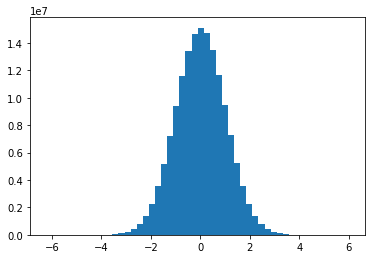

In [11]:
plt.hist(Vect_vox,bins=50)

/usr/lib64/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


NameError: name 'args' is not defined

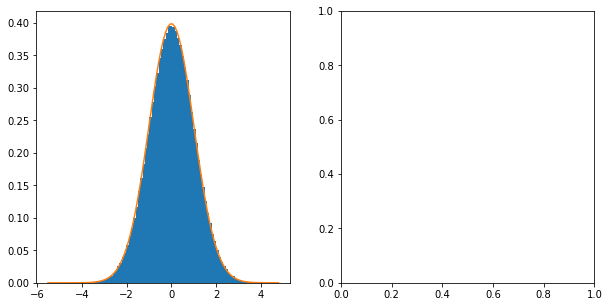

In [42]:
num_bins=100

f,(ax1,ax2) = plt.subplots(1,2,sharey=False,figsize=(10,5))

n, bins, patches = ax1.hist(np.array(Vect_vox_sample),num_bins,normed=1)
dist = scipy.stats.norm
y=dist.pdf(bins)
ax1.plot(bins, y, '-')

p_th = [t/len(Vect_vox_sample) for t in range(1,len(Vect_vox_sample)+1)]
line1, = ax2.loglog(p_th, sorted(dist.sf(np.array(Vect_vox_sample))), '.', linewidth=1,
                     label='Q-Q plot')
ax2.plot(p_th, p_th, '-')
ax2.set_title('Q-Q plot')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

In [34]:
from scipy.stats import norm

import pandas as pd

import matplotlib.mlab as mlab

import scipy.stats

def distribution_plot(title, data, dist, *args, **kwargs):
    np.random.seed(0)
    num_bins = 100
    

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10,5))

    # histogram plot
    n, bins, patches = ax1.hist(data, num_bins, normed=1)
    y = dist.pdf(bins, *args)       
    ax1.plot(bins, y, '-')
    ax1.set_title(title)
    
    # qq-plot plot
    p_th = [t/data.size for t in range(1,data.size+1)]

    line1, = ax2.loglog(p_th, sorted(dist.sf(data, *args)), '.', linewidth=1,
                     label=title)
    ax2.plot(p_th, p_th, '-')
    ax2.set_title('Q-Q plot')


    ax2.legend(loc='lower right')
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.show()

In [28]:
def z_distribution_plot(data, title, *args, **kwargs):   
    distribution_plot(title, data, scipy.stats.norm)
    
z_distribution_plot(np.array(Vect_vox_sample), 'QQ-plot')

NameError: name 'ax1' is not defined

/usr/lib64/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


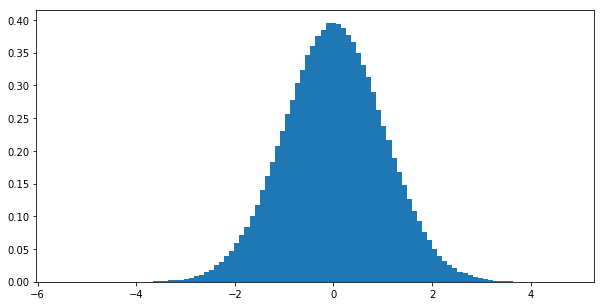

In [38]:
f, g1 = plt.subplots(1, sharey=False, figsize=(10,5))
n, bins, patches = g1.hist(Vect_vox_sample, 100, normed=1)
y = scipy.stats.norm.pdf(bins)